In [1]:
!pwd

/home1/kim03/myubai/kt_til/MoCL-NAACL-2024


In [2]:
import os
print(os.getcwd())

/gpfs/home1/kim03/myubai/kt_til/MoCL-NAACL-2024


In [3]:
import sys
sys.path.append("/home1/kim03/myubai/kt_til/MoCL-NAACL-2024_temp/")
print(sys.path)

['/home1/kim03/miniconda3/envs/kt_til/lib/python39.zip', '/home1/kim03/miniconda3/envs/kt_til/lib/python3.9', '/home1/kim03/miniconda3/envs/kt_til/lib/python3.9/lib-dynload', '', '/home1/kim03/miniconda3/envs/kt_til/lib/python3.9/site-packages', '/home1/kim03/myubai/kt_til/MoCL-NAACL-2024_temp/']


In [4]:
device = "cuda:1"
import torch
import pickle
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import model.task_feature_out_bert_aug as task_feature_out
from tasks.mtl5.dataloader_mtl_t5 import DataLoaderMTL
import torch.distributions as dist

In [64]:
path = []
mean_path = []
afri_mean_path = []
afri_feature_path = []
wos_feature_path = []
for i in range(7):
    path.append(f"/home1/kim03/myubai/kt_til/MoCL-NAACL-2024_temp/checkpoints_continual_wos/task_feature_setting_aug_seed_0_portion_100_23_19_49/{i}_dataset.pkl")
    mean_path.append(f"/home1/kim03/myubai/kt_til/MoCL-NAACL-2024_temp/checkpoints_continual_wos/task_feature_setting_aug_seed_0_portion_100_24_00_04/til_{i}_mean_of_input_query.pkl")
    wos_feature_path.append(f"/home1/kim03/myubai/kt_til/MoCL-NAACL-2024_temp/checkpoints_continual_wos/task_feature_setting_aug_seed_0_portion_100_24_00_04/til_{i}_embed_prototypes.pkl")
for i in range(12):
    afri_mean_path.append(f"/home1/kim03/myubai/kt_til/MoCL-NAACL-2024_temp/checkpoints_continual_afrisenti/order_0_aug_seed_2_portion_100_23_18_21/til_{i}_mean_of_input_query.pkl")
    afri_feature_path.append(f"/home1/kim03/myubai/kt_til/MoCL-NAACL-2024_temp/checkpoints_continual_afrisenti/order_0_aug_seed_2_portion_100_23_18_21/til_{i}_embed_prototypes.pkl")


In [65]:
whole_data = {"0": [], "1": [], "2": [], "3": [], "4": [], "5": [], "6": []}
mean_data = {"0": [], "1": [], "2": [], "3": [], "4": [], "5": [], "6": []}
task_feature_wos = {"0": [], "1": [], "2": [], "3": [], "4": [], "5": [], "6": []}
mean_afri = {"0": [], "1": [], "2": [], "3": [], "4": [], "5": [], "6": [], "7": [], "8": [], "9": [], "10": [], "11": []}
task_feature_afri = {"0": [], "1": [], "2": [], "3": [], "4": [], "5": [], "6": [], "7": [], "8": [], "9": [], "10": [], "11": []}
for i in range(7):
    
#     with open(path[i], 'rb') as f:
#         data = pickle.load(f)
#         for j in range(200):
#             whole_data[str(i)].append(data[j][0])
            
    with open(mean_path[i], 'rb') as f:
        data = pickle.load(f)
        mean_data[str(i)] = data
        
    with open(wos_feature_path[i], 'rb') as f:
        data = pickle.load(f)
        task_feature_wos[str(i)] = data

for i in range(12):
    with open(afri_mean_path[i], 'rb') as f:
        data = pickle.load(f)
        mean_afri[str(i)] = data
    with open(afri_feature_path[i], 'rb') as f:
        data = pickle.load(f)
        task_feature_afri[str(i)] = data

In [73]:
task_feature_afri["11"][0].shape

torch.Size([1024])

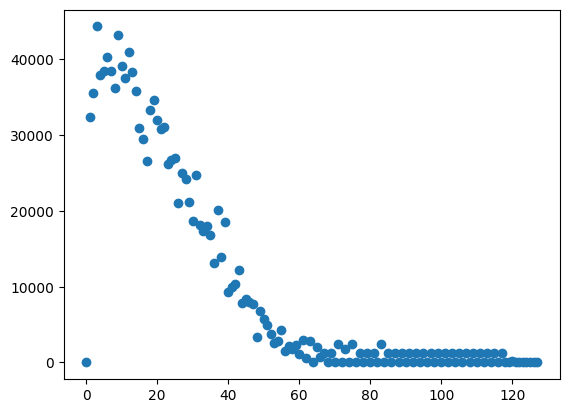

In [50]:
plt.scatter(list(range(0,128)), mean_afri["1"]["0"])

In [51]:
print(mean_afri["11"]["0"],mean_afri["11"]["1"])

tensor([3.4642e+00, 1.7939e+04, 2.2258e+04, 3.0967e+04, 2.1665e+04, 2.1375e+04,
        2.5656e+04, 2.3834e+04, 2.2120e+04, 2.6915e+04, 2.5421e+04, 2.3959e+04,
        2.5911e+04, 2.3920e+04, 2.3639e+04, 2.3346e+04, 2.0749e+04, 1.9822e+04,
        2.0780e+04, 2.0244e+04, 1.7842e+04, 1.8789e+04, 1.6082e+04, 1.7119e+04,
        1.5945e+04, 1.3117e+04, 1.4086e+04, 1.3743e+04, 1.2055e+04, 1.2478e+04,
        1.0324e+04, 1.2156e+04, 9.6246e+03, 1.1654e+04, 8.6269e+03, 8.9145e+03,
        7.6717e+03, 7.7671e+03, 6.2809e+03, 8.5167e+03, 6.9077e+03, 5.9076e+03,
        6.0939e+03, 5.9594e+03, 4.3099e+03, 5.5207e+03, 3.2135e+03, 5.0117e+03,
        3.2230e+03, 3.8363e+03, 2.5764e+03, 3.6041e+03, 3.7644e+03, 2.6749e+03,
        2.3538e+03, 3.1882e+03, 1.4717e+03, 3.0689e+03, 2.2172e+03, 2.7351e+03,
        1.4675e+03, 3.4958e+03, 1.5624e+03, 1.4082e+03, 1.1097e+03, 1.8692e+03,
        1.2390e+03, 1.6545e+03, 7.3007e+02, 1.6743e+03, 5.0221e+02, 1.1587e+03,
        8.2720e+02, 1.0935e+03, 5.0553e+

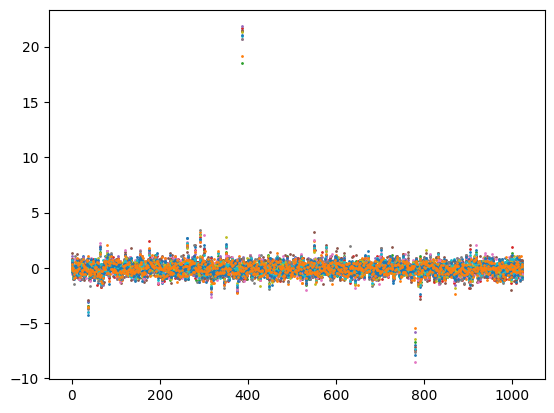

In [81]:
for i in range(12):
    plt.scatter(list(range(0,1024)), task_feature_afri["11"][i].cpu(), s=1)

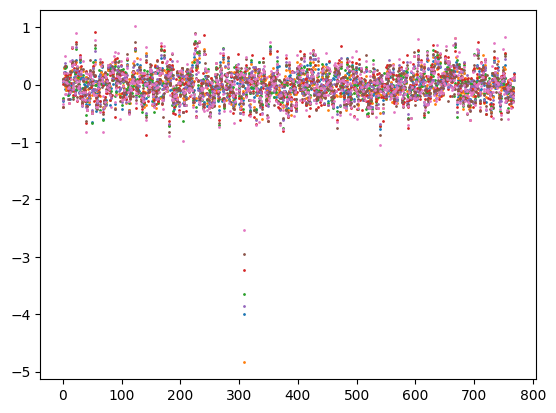

In [82]:
for i in range(7):
    plt.scatter(list(range(0,768)), task_feature_wos["6"][i].cpu(), s=1)

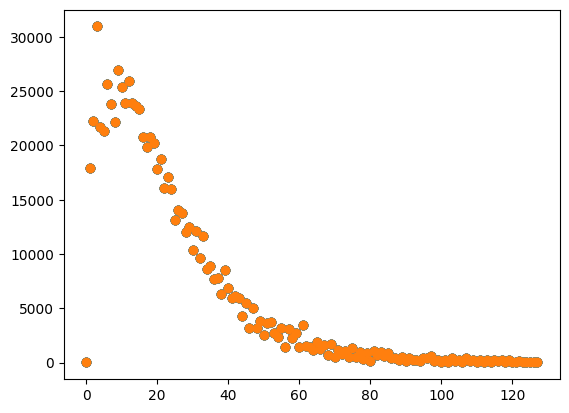

In [63]:
for i in range(12):
    plt.scatter(list(range(0,128)), mean_afri["11"][f"{i}"])
    # plt.show()

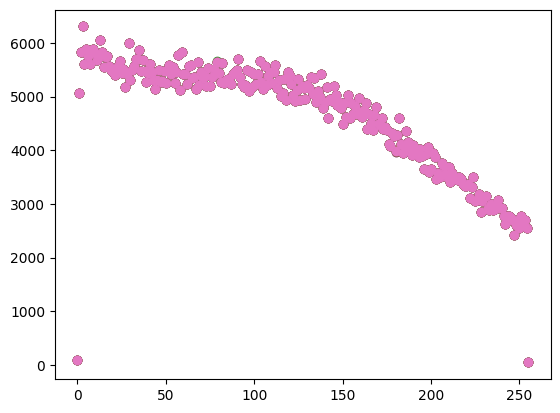

In [61]:
for i in range(7):
    plt.scatter(list(range(0,256)), mean_data["6"][f"{i}"])
    # plt.show()

In [ ]:
for i in range(20):
    plt.scatter(torch.stack(whole_data["0"])[0])
    plt.xlabel("sample_index")
    plt.ylabel("output")
    plt.title(f"token_index_{i}")
    plt.show()

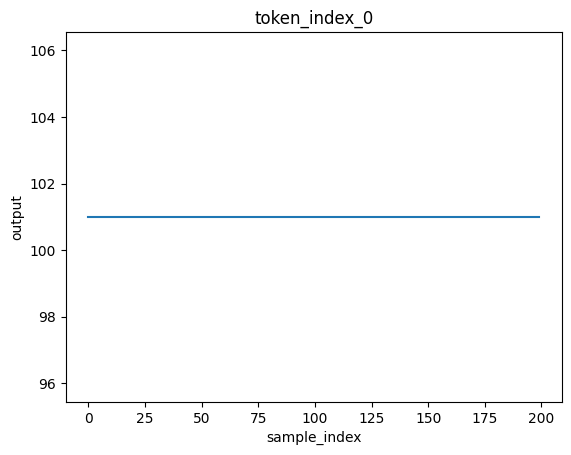

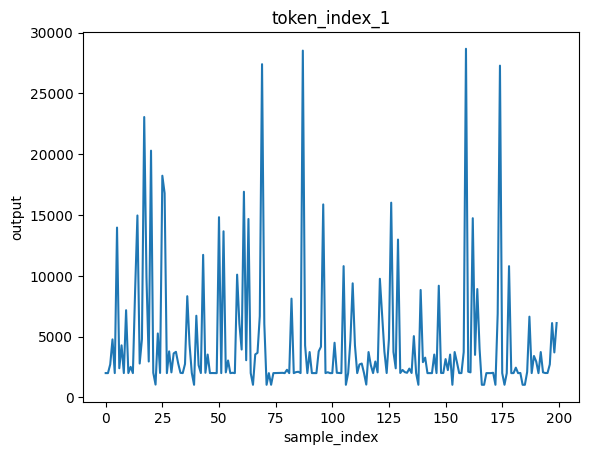

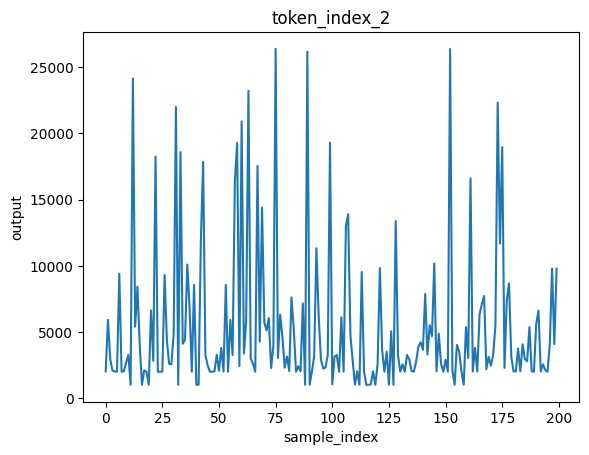

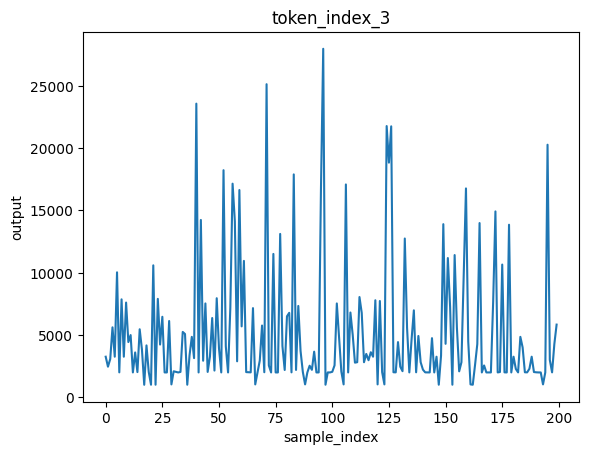

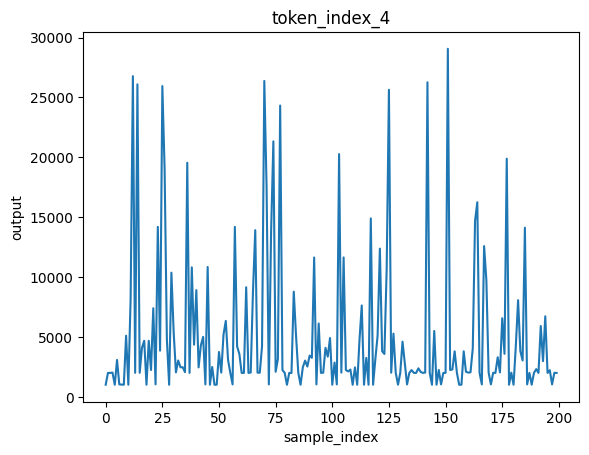

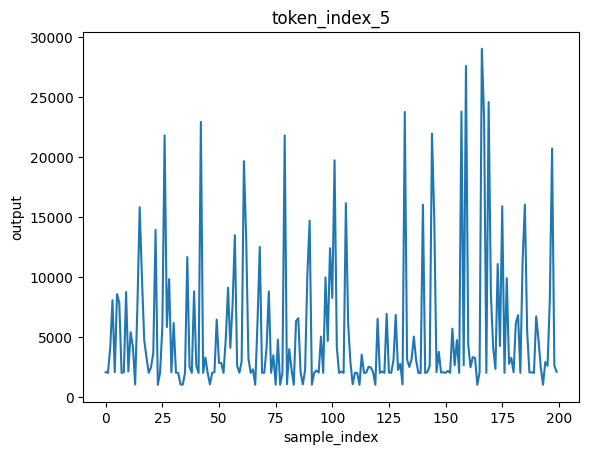

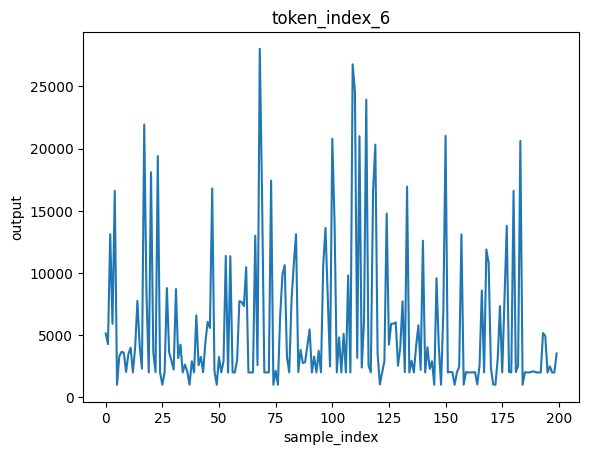

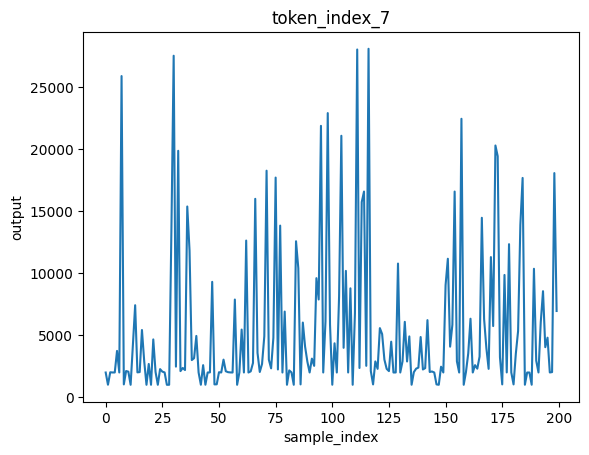

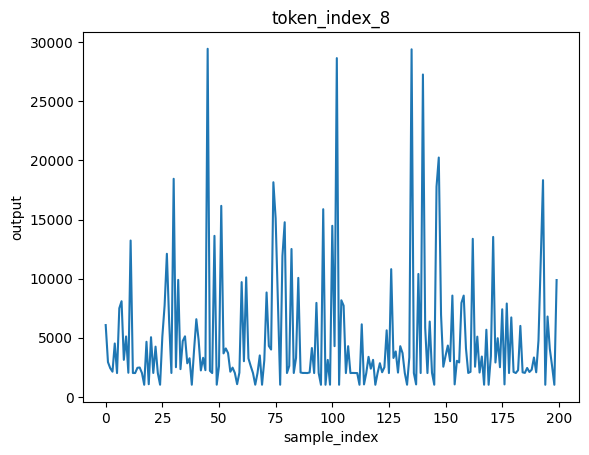

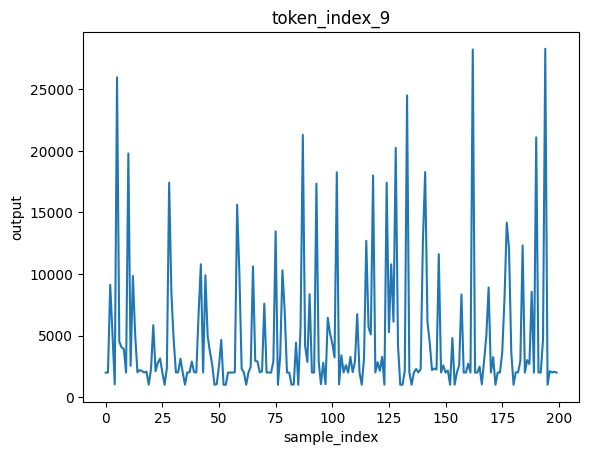

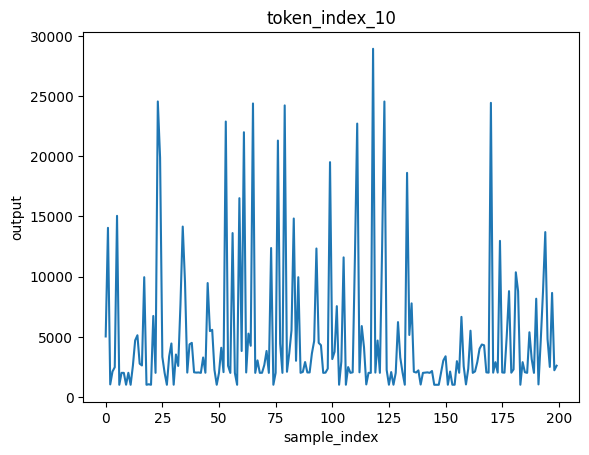

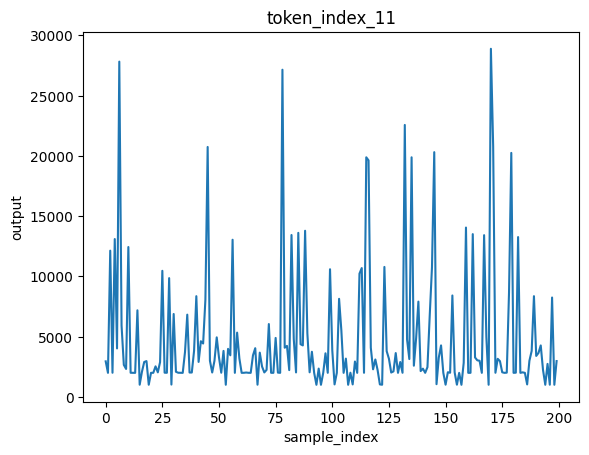

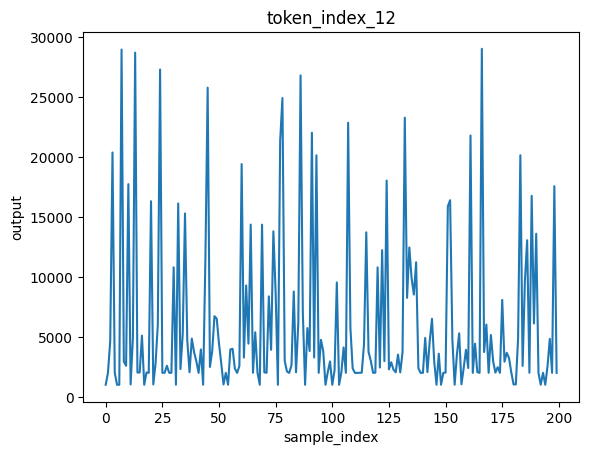

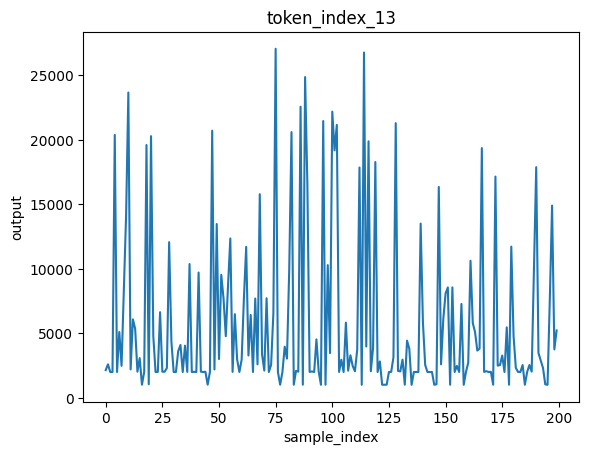

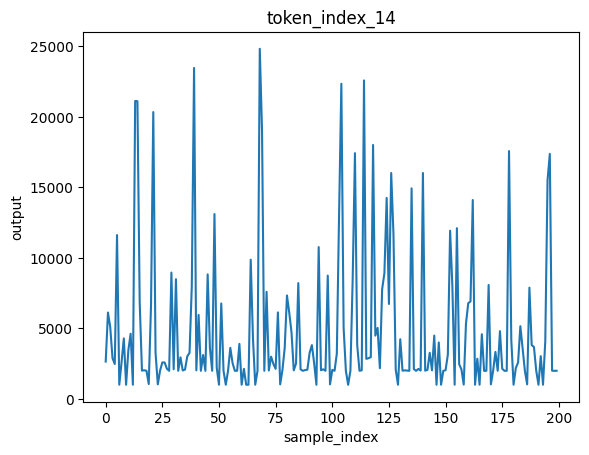

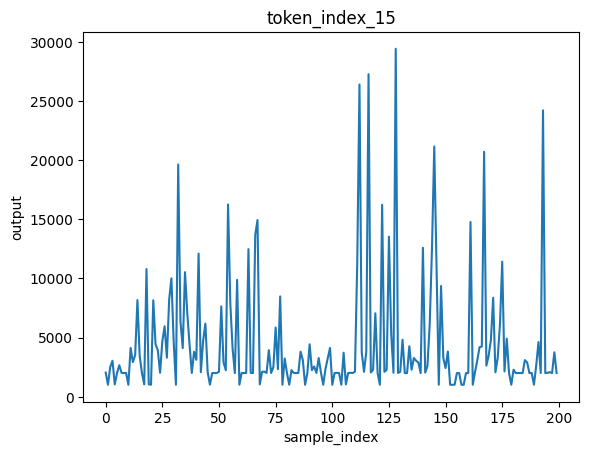

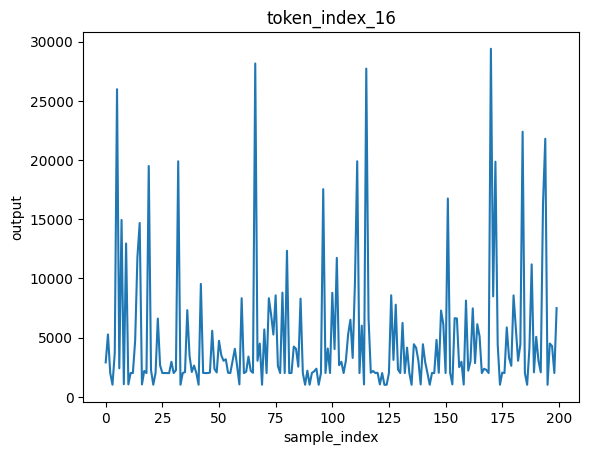

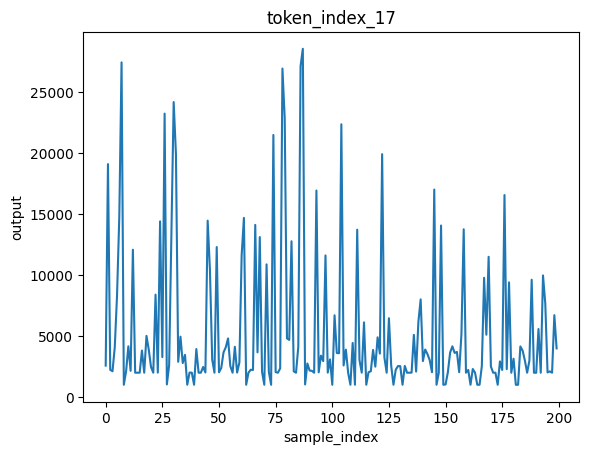

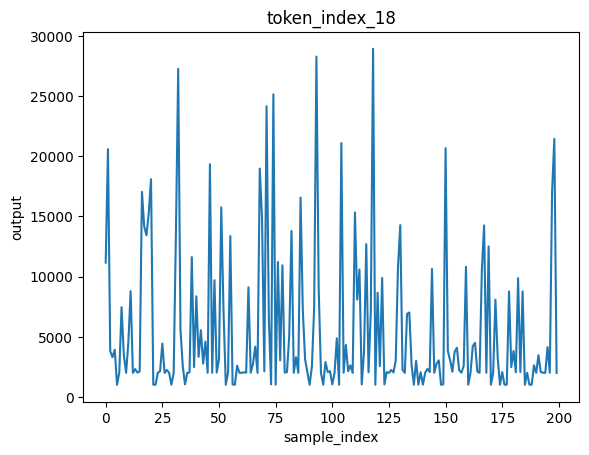

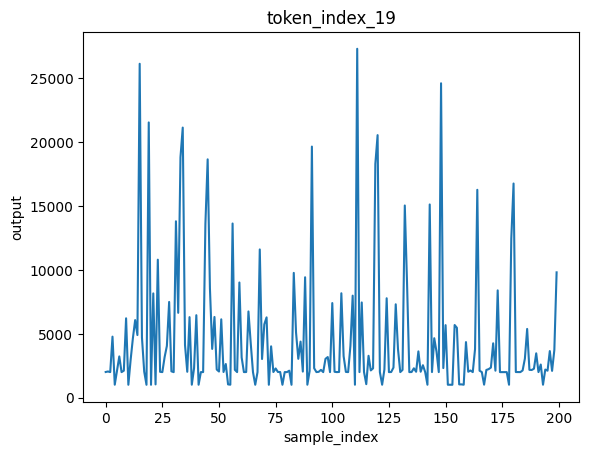

In [70]:
for i in range(20):
    plt.plot(torch.stack(whole_data["0"])[:, i])
    plt.xlabel("sample_index")
    plt.ylabel("output")
    plt.title(f"token_index_{i}")
    plt.show()

In [ ]:
whole_data["0"][0][0]

tensor(101)

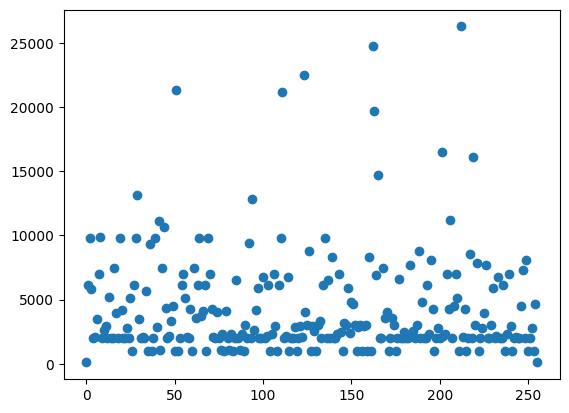

In [ ]:
plt.scatter(list(range(0,256)), whole_data["0"][-1])